# Stage 2: Airbnb Amsterdam  - EDA (Explanatory Data Analysis)

by Orit Ophir

In [1]:
import numpy as np
import os 
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns
sns.set()
plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')

C:\Users\ophir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ophir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Uploading data file:

In [2]:
df = pd.read_csv('amsterdam_final_data.csv')
df.head()

Unnamed: 0        id   host_id host_location  host_response_time  \
0           0   5957043  30922450   Netherlands                 NaN   
1           1  12279014  66160250   Netherlands                 NaN   
2           2  13824148  79317608   Netherlands  within a few hours   
3           3  15350277  18571882   Netherlands                 NaN   
4           4  15885709  28689390   Netherlands                 NaN   

   host_response_rate  host_is_superhost host_neighbourhood  \
0                 NaN                0.0                NaN   
1                 NaN                0.0                NaN   
2               100.0                1.0                NaN   
3                 NaN                0.0                NaN   
4                 NaN                0.0                NaN   

   host_total_listings_count  host_has_profile_pic  ...  _'jumio' _'facebook'  \
0                        1.0                   1.0  ...         1           0   
1                        1.0                   1.0  ...         1           1   
2                        1.0                   1.0  ...         1           1   
3                        1.0                   1.0  ...         1           1   
4                        1.0                   1.0  ...         1           0   

  _'offline_government_id'  _'government_id'  _'selfie'  _'identity_manual'  \
0                        0                 0          0                   0   
1                        0                 0          0                   0   
2                        0                 0          0                   0   
3                        1                 1          0                   0   
4                        0                 0          0                   0   

  _'work_email' _'google'  'phone'  _'manual_offline'  
0             0         0        0                  0  
1             0         0        0                  0  
2             0         0        0                  0  
3             0         0        0                  0  
4             0         0        0                  0  

[5 rows x 160 columns]

In [3]:
#common error uppon dataset upload
del  df['Unnamed: 0']

Columns information:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Columns: 159 entries, id to _'manual_offline'
dtypes: float64(26), int64(123), object(10)
memory usage: 24.3+ MB


In [5]:
df.shape

(20030, 159)

# Data Protocol

Exporting results to the protocol

In [6]:
# Type of valaues 
df.dtypes.to_excel("Amsterdam_datatype.xlsx",
             sheet_name='data_type')
# Maximum valaues 
df.max().to_excel("max_amsterdam.xlsx",
             sheet_name='max')
# Minimum Values
df.min().to_excel("min_amsterdam.xlsx",
             sheet_name='min')
# Missing Values
df.isnull().sum(axis=0).to_excel("NA_amsterdam.xlsx",
             sheet_name='NA')
# exporting results to the protocol
df.nunique().to_excel("unique_amsterdam.xlsx",
             sheet_name='unique')

In [7]:
#get dummies
df_dummy = df[[col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]]
df_dummy.shape

(20030, 114)

In [8]:
#get all numeric data
cols = df.columns
df_num = df._get_numeric_data().columns.dropna().unique()
df_num.shape

(149,)

In [9]:
df_num_non_dummy = df[set(df_num)-set(df_dummy)]
df_num_non_dummy.drop(['id', 'host_id'], axis=1, inplace=True)
df_num_non_dummy.shape

(20030, 33)

In [10]:
#get categorial data
df_categorial=df[list(set(cols) - set(df_num))]
df_categorial.shape

(20030, 10)

# Descriptive Statistics

Initial reports performed by Sweetwiz providing us with instant overview of data behavior

### Sweetwiz

In [11]:
#import sweetviz as sv
#sweet_report = sv.analyze(df)
#sweet_report.show_html('airbnb_amsterdam_sweetwiz_report.html')

### Autoviz report

In [12]:
#from autoviz.AutoViz_Class import AutoViz_Class
#%matplotlib inline
#AV = AutoViz_Class()
#AV.AutoViz('amsterdam_final_data.csv')

# Descriptive Statistics

In [13]:
df.iloc[:,:30].describe()

id       host_id  host_response_rate  host_is_superhost  \
count  2.003000e+04  2.003000e+04        10547.000000       20026.000000   
mean   1.541725e+07  4.868570e+07           93.755950           0.158294   
std    8.569404e+06  5.649635e+07           17.034864           0.365026   
min    2.818000e+03  3.159000e+03            0.000000           0.000000   
25%    8.188423e+06  8.093516e+06          100.000000           0.000000   
50%    1.563049e+07  2.369450e+07          100.000000           0.000000   
75%    2.202577e+07  6.827535e+07          100.000000           0.000000   
max    3.058041e+07  2.293612e+08          100.000000           1.000000   

       host_total_listings_count  host_has_profile_pic  \
count               20026.000000          20026.000000   
mean                    6.105812              0.998951   
std                    30.388516              0.032366   
min                     0.000000              0.000000   
25%                     1.000000              1.000000   
50%                     1.000000              1.000000   
75%                     1.000000              1.000000   
max                   698.000000              1.000000   

       host_identity_verified      latitude     longitude  is_location_exact  \
count            20026.000000  20030.000000  20030.000000       20030.000000   
mean                 0.413013     52.365212      4.888977           0.698053   
std                  0.492387      0.015996      0.035573           0.459114   
min                  0.000000     52.288378      4.753247           0.000000   
25%                  0.000000     52.355126      4.863595           0.000000   
50%                  0.000000     52.364590      4.886387           1.000000   
75%                  1.000000     52.375074      4.908288           1.000000   
max                  1.000000     52.424713      5.027689           1.000000   

       ...     bedrooms          beds         price  weekly_price  \
count  ...  20022.00000  20023.000000  20030.000000   2843.000000   
mean   ...      1.44506      1.849223    152.181178    821.054872   
std    ...      0.88568      1.389664    145.828976    458.844485   
min    ...      0.00000      0.000000      0.000000    100.000000   
25%    ...      1.00000      1.000000     96.000000    550.000000   
50%    ...      1.00000      1.000000    125.000000    700.000000   
75%    ...      2.00000      2.000000    175.000000    950.000000   
max    ...     12.00000     32.000000   8500.000000   6000.000000   

       security_deposit  cleaning_fee  guests_included  extra_people  \
count      13864.000000  16401.000000     20030.000000  20030.000000   
mean         221.875577     39.271569         1.468997     11.315876   
std          340.210814     24.268398         0.937890     22.152063   
min            0.000000      0.000000         1.000000      0.000000   
25%            0.000000     25.000000         1.000000      0.000000   
50%          150.000000     35.000000         1.000000      0.000000   
75%          295.000000     50.000000         2.000000     20.000000   
max         4736.000000    531.000000        16.000000    280.000000   

       minimum_nights  maximum_nights  
count    20030.000000    20030.000000  
mean         3.328707      631.225711  
std         12.537419      541.339981  
min          1.000000        1.000000  
25%          2.000000       21.000000  
50%          2.000000     1125.000000  
75%          3.000000     1125.000000  
max       1001.000000     9999.000000  

[8 rows x 22 columns]

In [14]:
df.iloc[:,30:60].describe()

availability_30  availability_60  availability_90  availability_365  \
count     20030.000000     20030.000000     20030.000000      20030.000000   
mean          4.905642        11.411233        18.168597         59.913679   
std           7.942903        17.498603        27.704834        104.027710   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         0.000000          3.000000   
75%           7.000000        18.000000        28.000000         67.000000   
max          30.000000        60.000000        90.000000        365.000000   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
count       20030.000000          17391.000000            17381.000000   
mean           21.560459             94.849520                9.679765   
std            43.240292              6.648685                0.685271   
min             0.000000             20.000000                2.000000   
25%             3.000000             93.000000                9.000000   
50%             8.000000             97.000000               10.000000   
75%            22.000000            100.000000               10.000000   
max           695.000000            100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               17383.000000           17369.000000   
mean                    9.465627               9.735563   
std                     0.867973               0.646557   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  ...  years_of_hosting  \
count                 17378.000000  ...      20030.000000   
mean                      9.785361  ...          4.996256   
std                       0.599409  ...          1.860757   
min                       2.000000  ...          0.000000   
25%                      10.000000  ...          4.000000   
50%                      10.000000  ...          5.000000   
75%                      10.000000  ...          6.000000   
max                      10.000000  ...         11.000000   

       qnum_since_last_review  qnum_since_first_review            tv  \
count            20030.000000             20030.000000  20030.000000   
mean                 6.101648                11.452521      0.779730   
std                  3.864363                 7.118872      0.414439   
min                  0.000000                 0.000000      0.000000   
25%                  5.000000                 6.000000      1.000000   
50%                  5.000000                11.000000      1.000000   
75%                  7.000000                16.000000      1.000000   
max                 33.000000                44.000000      1.000000   

           cable_tv      internet          wifi       kitchen  \
count  20030.000000  20030.000000  20030.000000  20030.000000   
mean       0.395956      0.373240      0.972042      0.912831   
std        0.489067      0.483677      0.164857      0.282090   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      1.000000   
50%        0.000000      0.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       free_parking_on_premises       heating  
count              20030.000000  20030.000000  
mean                   0.095706      0.965652  
std                    0.294196      0.182127  
min                    0.000000      0.000000  
25%                    0.000000      1.000000  
50%                    0.000000 

In [15]:
df.iloc[:,60:90].describe()

washer  smoke_detector    essentials       hangers          iron  \
count  20030.000000    20030.000000  20030.000000  20030.000000  20030.000000   
mean       0.759261        0.787269      0.959311      0.707039      0.661757   
std        0.427543        0.409249      0.197574      0.455132      0.473123   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        1.000000        1.000000      1.000000      0.000000      0.000000   
50%        1.000000        1.000000      1.000000      1.000000      1.000000   
75%        1.000000        1.000000      1.000000      1.000000      1.000000   
max        1.000000        1.000000      1.000000      1.000000      1.000000   

              dryer  carbon_monoxide_detector   hair_dryer  \
count  20030.000000              20030.000000  20030.00000   
mean       0.444783                  0.377933      0.65352   
std        0.496954                  0.484883      0.47586   
min        0.000000                  0.000000      0.00000   
25%        0.000000                  0.000000      0.00000   
50%        0.000000                  0.000000      1.00000   
75%        1.000000                  1.000000      1.00000   
max        1.000000                  1.000000      1.00000   

       translation_missing:_en.hosting_amenity_49  \
count                                20030.000000   
mean                                     0.186720   
std                                      0.389696   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       translation_missing:_en.hosting_amenity_50  ...       hot_tub  \
count                                20030.000000  ...  20030.000000   
mean                                     0.239840  ...      0.028657   
std                                      0.426996  ...      0.166845   
min                                      0.000000  ...      0.000000   
25%                                      0.000000  ...      0.000000   
50%                                      0.000000  ...      0.000000   
75%                                      0.000000  ...      0.000000   
max                                      1.000000  ...      1.000000   

        safety_card  buzzer/wireless_intercom  24_hour_check_in  \
count  20030.000000              20030.000000      20030.000000   
mean       0.135846                  0.150674          0.096355   
std        0.342634                  0.357740          0.295085   
min        0.000000                  0.000000          0.000000   
25%        0.000000                  0.000000          0.000000   
50%        0.000000                  0.000000          0.000000   
75%        0.000000                  0.000000          0.000000   
max        1.000000                  1.000000          1.000000   

       private_entrance     breakfast  host_greets_you  \
count      20030.000000  20030.000000     20030.000000   
mean           0.271942      0.069695         0.310734   
std            0.444971      0.254639         0.462806   
min            0.000000      0.000000         0.000000   
25%            0.000000      0.000000         0.000000   
50%            0.000000      0.000000         0.000000   
75%            1.000000      0.000000         1.000000   
max            1.000000      1.000000         1.000000   

       paid_parking_off_premises  baby_monitor     baby_bath  
count               20030.000000  20030.000000  20030.000000  
mean                    0.241088      0.012082      0.024863  
std                     0.427754      0.109254      0.155711  
min                     0.000000      0.000000      0.000000  
25%                     0.000000      0.000000      0.000000  
50%                     0.000000      0.000000      0.000000  
75%                     0.000

In [16]:
df.iloc[:,90:120].describe()

changing_table    high_chair  children’s_books_and_toys  \
count    20030.000000  20030.000000               20030.000000   
mean         0.029256      0.077683                   0.089715   
std          0.168528      0.267680                   0.285781   
min          0.000000      0.000000                   0.000000   
25%          0.000000      0.000000                   0.000000   
50%          0.000000      0.000000                   0.000000   
75%          0.000000      0.000000                   0.000000   
max          1.000000      1.000000                   1.000000   

       babysitter_recommendations          crib  pack_’n_play/travel_crib  \
count                20030.000000  20030.000000              20030.000000   
mean                     0.025861      0.062906                  0.033300   
std                      0.158725      0.242799                  0.179423   
min                      0.000000      0.000000                  0.000000   
25%                      0.000000      0.000000                  0.000000   
50%                      0.000000      0.000000                  0.000000   
75%                      0.000000      0.000000                  0.000000   
max                      1.000000      1.000000                  1.000000   

       room_darkening_shades  children’s_dinnerware     hot_water  \
count           20030.000000           20030.000000  20030.000000   
mean                0.040739               0.043684      0.465252   
std                 0.197690               0.204397      0.498804   
min                 0.000000               0.000000      0.000000   
25%                 0.000000               0.000000      0.000000   
50%                 0.000000               0.000000      0.000000   
75%                 0.000000               0.000000      1.000000   
max                 1.000000               1.000000      1.000000   

         bed_linens  ...  single_level_home  patio_or_balcony    waterfront  \
count  20030.000000  ...       20030.000000      20030.000000  20030.000000   
mean       0.269246  ...           0.054019          0.161458      0.037943   
std        0.443579  ...           0.226061          0.367962      0.191063   
min        0.000000  ...           0.000000          0.000000      0.000000   
25%        0.000000  ...           0.000000          0.000000      0.000000   
50%        0.000000  ...           0.000000          0.000000      0.000000   
75%        1.000000  ...           0.000000          0.000000      0.000000   
max        1.000000  ...           1.000000          1.000000      1.000000   

       private_living_room  lock_on_bedroom_door  garden_or_backyard  \
count         20030.000000          20030.000000        20030.000000   
mean              0.101797              0.138143            0.068347   
std               0.302389              0.345058            0.252348   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

       indoor_fireplace  long_term_stays_allowed  wide_doorway  \
count      20030.000000             20030.000000  20030.000000   
mean           0.055517                 0.121018      0.048827   
std            0.228992                 0.326157      0.215511   
min            0.000000                 0.000000      0.000000   
25%            0.000000                 0.000000      0.000000   
50%            0.000000                 0.000000      0.000000   
75%            0.000000                 0.000000      0.000000   
max            1.000000                 1.000000      1.000000   

       step_free_access  
count      20030.000000  
mean           0.062556  
std            0.242169  
min            0.000000  
25%       

In [17]:
df.iloc[:,120:-1].describe()

accessible_height_bed         other  paid_parking_on_premises  \
count           20030.000000  20030.000000              20030.000000   
mean                0.038692      0.063605                  0.074588   
std                 0.192865      0.244053                  0.262732   
min                 0.000000      0.000000                  0.000000   
25%                 0.000000      0.000000                  0.000000   
50%                 0.000000      0.000000                  0.000000   
75%                 0.000000      0.000000                  0.000000   
max                 1.000000      1.000000                  1.000000   

       wheelchair_accessible  self_check_in       lockbox  \
count           20030.000000   20030.000000  20030.000000   
mean                0.046380       0.061008      0.040489   
std                 0.210313       0.239352      0.197109   
min                 0.000000       0.000000      0.000000   
25%                 0.000000       0.000000      0.000000   
50%                 0.000000       0.000000      0.000000   
75%                 0.000000       0.000000      0.000000   
max                 1.000000       1.000000      1.000000   

       pets_live_on_this_property  building_staff       bathtub  \
count                20030.000000    20030.000000  20030.000000   
mean                     0.055617        0.010884      0.075637   
std                      0.229186        0.103758      0.264422   
min                      0.000000        0.000000      0.000000   
25%                      0.000000        0.000000      0.000000   
50%                      0.000000        0.000000      0.000000   
75%                      0.000000        0.000000      0.000000   
max                      1.000000        1.000000      1.000000   

       window_guards  ...    _'reviews'      _'jumio'   _'facebook'  \
count   20030.000000  ...  20030.000000  20030.000000  20030.000000   
mean        0.019920  ...      0.845382      0.609935      0.243435   
std         0.139729  ...      0.361549      0.487777      0.429166   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      1.000000      0.000000      0.000000   
50%         0.000000  ...      1.000000      1.000000      0.000000   
75%         0.000000  ...      1.000000      1.000000      0.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

       _'offline_government_id'  _'government_id'     _'selfie'  \
count              20030.000000      20030.000000  20030.000000   
mean                   0.220070          0.275537      0.178832   
std                    0.414304          0.446795      0.383221   
min                    0.000000          0.000000      0.000000   
25%                    0.000000          0.000000      0.000000   
50%                    0.000000          0.000000      0.000000   
75%                    0.000000          1.000000      0.000000   
max                    1.000000          1.000000      1.000000   

       _'identity_manual'  _'work_email'     _'google'       'phone'  
count        20030.000000   20030.000000  20030.000000  20030.000000  
mean             0.172441       0.123615      0.046380      0.055567  
std              0.377773       0.329150      0.210313      0.229089  
min              0.000000       0.000000      0.000000      0.000000  
25%              0.000000       0.000000      0.000000      0.000000  
50%              0.000000       0.000000      0.000000      0.000000  
75%              0.000000       0.000000      0.000000      0.000000  
max              1.000000       1.000000      1.000000      1.000000  

[8 rows x 38 columns]

In [18]:
df.describe()

id       host_id  host_response_rate  host_is_superhost  \
count  2.003000e+04  2.003000e+04        10547.000000       20026.000000   
mean   1.541725e+07  4.868570e+07           93.755950           0.158294   
std    8.569404e+06  5.649635e+07           17.034864           0.365026   
min    2.818000e+03  3.159000e+03            0.000000           0.000000   
25%    8.188423e+06  8.093516e+06          100.000000           0.000000   
50%    1.563049e+07  2.369450e+07          100.000000           0.000000   
75%    2.202577e+07  6.827535e+07          100.000000           0.000000   
max    3.058041e+07  2.293612e+08          100.000000           1.000000   

       host_total_listings_count  host_has_profile_pic  \
count               20026.000000          20026.000000   
mean                    6.105812              0.998951   
std                    30.388516              0.032366   
min                     0.000000              0.000000   
25%                     1.000000              1.000000   
50%                     1.000000              1.000000   
75%                     1.000000              1.000000   
max                   698.000000              1.000000   

       host_identity_verified      latitude     longitude  is_location_exact  \
count            20026.000000  20030.000000  20030.000000       20030.000000   
mean                 0.413013     52.365212      4.888977           0.698053   
std                  0.492387      0.015996      0.035573           0.459114   
min                  0.000000     52.288378      4.753247           0.000000   
25%                  0.000000     52.355126      4.863595           0.000000   
50%                  0.000000     52.364590      4.886387           1.000000   
75%                  1.000000     52.375074      4.908288           1.000000   
max                  1.000000     52.424713      5.027689           1.000000   

       ...      _'jumio'   _'facebook'  _'offline_government_id'  \
count  ...  20030.000000  20030.000000              20030.000000   
mean   ...      0.609935      0.243435                  0.220070   
std    ...      0.487777      0.429166                  0.414304   
min    ...      0.000000      0.000000                  0.000000   
25%    ...      0.000000      0.000000                  0.000000   
50%    ...      1.000000      0.000000                  0.000000   
75%    ...      1.000000      0.000000                  0.000000   
max    ...      1.000000      1.000000                  1.000000   

       _'government_id'     _'selfie'  _'identity_manual'  _'work_email'  \
count      20030.000000  20030.000000        20030.000000   20030.000000   
mean           0.275537      0.178832            0.172441       0.123615   
std            0.446795      0.383221            0.377773       0.329150   
min            0.000000      0.000000            0.000000       0.000000   
25%            0.000000      0.000000            0.000000       0.000000   
50%            0.000000      0.000000            0.000000       0.000000   
75%            1.000000      0.000000            0.000000       0.000000   
max            1.000000      1.000000            1.000000       1.000000   

          _'google'       'phone'  _'manual_offline'  
count  20030.000000  20030.000000       20030.000000  
mean       0.046380      0.055567           0.021468  
std        0.210313      0.229089           0.144941  
min        0.000000      0.000000           0.000000  
25%        0.000000      0.000000           0.000000  
50%        0.000000      0.000000           0.000000  
75%        0.000000      0.000000           0.000000  
max        1.000000      1.000000           1.000000  

[8 rows x 149 columns]

In [19]:
df_dummy.iloc[:,:55].describe()


host_is_superhost  host_has_profile_pic  host_identity_verified  \
count       20026.000000          20026.000000            20026.000000   
mean            0.158294              0.998951                0.413013   
std             0.365026              0.032366                0.492387   
min             0.000000              0.000000                0.000000   
25%             0.000000              1.000000                0.000000   
50%             0.000000              1.000000                0.000000   
75%             0.000000              1.000000                1.000000   
max             1.000000              1.000000                1.000000   

       is_location_exact  instant_bookable  is_business_travel_ready  \
count       20030.000000      20030.000000                   20030.0   
mean            0.698053          0.239641                       0.0   
std             0.459114          0.426875                       0.0   
min             0.000000          0.000000                       0.0   
25%             0.000000          0.000000                       0.0   
50%             1.000000          0.000000                       0.0   
75%             1.000000          0.000000                       0.0   
max             1.000000          1.000000                       0.0   

       require_guest_profile_picture  require_guest_phone_verification  \
count                   20030.000000                      20030.000000   
mean                        0.012332                          0.016126   
std                         0.110363                          0.125963   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         0.000000                          0.000000   
75%                         0.000000                          0.000000   
max                         1.000000                          1.000000   

                 tv      cable_tv  ...  changing_table    high_chair  \
count  20030.000000  20030.000000  ...    20030.000000  20030.000000   
mean       0.779730      0.395956  ...        0.029256      0.077683   
std        0.414439      0.489067  ...        0.168528      0.267680   
min        0.000000      0.000000  ...        0.000000      0.000000   
25%        1.000000      0.000000  ...        0.000000      0.000000   
50%        1.000000      0.000000  ...        0.000000      0.000000   
75%        1.000000      1.000000  ...        0.000000      0.000000   
max        1.000000      1.000000  ...        1.000000      1.000000   

       children’s_books_and_toys  babysitter_recommendations          crib  \
count               20030.000000                20030.000000  20030.000000   
mean                    0.089715                    0.025861      0.062906   
std                     0.285781                    0.158725      0.242799   
min                     0.000000                    0.000000      0.000000   
25%                     0.000000                    0.000000      0.000000   
50%                     0.000000                    0.000000      0.000000   
75%                     0.000000                    0.000000      0.000000   
max                     1.000000                    1.000000      1.000000   

       pack_’n_play/travel_crib  room_darkening_shades  children’s_dinnerware  \
count              20030.000000           20030.000000           20030.000000   
mean                   0.033300               0.040739               0.043684   
std                    0.179423               0.197690               0.204397   
min                    0.000000               0.000000               0.000000   
25%                    0.000000               0.000000               0.000000   
50%                    0.000000               0.000000               0.000000   
75%                    0.000000               0.000000               0.000000   
max                    1

In [20]:
df_dummy.iloc[:,:55:-1].describe()

_'manual_offline'       'phone'     _'google'  _'work_email'  \
count       20030.000000  20030.000000  20030.000000   20030.000000   
mean            0.021468      0.055567      0.046380       0.123615   
std             0.144941      0.229089      0.210313       0.329150   
min             0.000000      0.000000      0.000000       0.000000   
25%             0.000000      0.000000      0.000000       0.000000   
50%             0.000000      0.000000      0.000000       0.000000   
75%             0.000000      0.000000      0.000000       0.000000   
max             1.000000      1.000000      1.000000       1.000000   

       _'identity_manual'     _'selfie'  _'government_id'  \
count        20030.000000  20030.000000      20030.000000   
mean             0.172441      0.178832          0.275537   
std              0.377773      0.383221          0.446795   
min              0.000000      0.000000          0.000000   
25%              0.000000      0.000000          0.000000   
50%              0.000000      0.000000          0.000000   
75%              0.000000      0.000000          1.000000   
max              1.000000      1.000000          1.000000   

       _'offline_government_id'   _'facebook'      _'jumio'  ...  \
count              20030.000000  20030.000000  20030.000000  ...   
mean                   0.220070      0.243435      0.609935  ...   
std                    0.414304      0.429166      0.487777  ...   
min                    0.000000      0.000000      0.000000  ...   
25%                    0.000000      0.000000      0.000000  ...   
50%                    0.000000      0.000000      1.000000  ...   
75%                    0.000000      0.000000      1.000000  ...   
max                    1.000000      1.000000      1.000000  ...   

       single_level_home         stove          oven  cooking_basics  \
count       20030.000000  20030.000000  20030.000000    20030.000000   
mean            0.054019      0.232102      0.235946        0.231503   
std             0.226061      0.422184      0.424599        0.421803   
min             0.000000      0.000000      0.000000        0.000000   
25%             0.000000      0.000000      0.000000        0.000000   
50%             0.000000      0.000000      0.000000        0.000000   
75%             0.000000      0.000000      0.000000        0.000000   
max             1.000000      1.000000      1.000000        1.000000   

       dishes_and_silverware    dishwasher  refrigerator  coffee_maker  \
count           20030.000000  20030.000000  20030.000000  20030.000000   
mean                0.266301      0.212431      0.277434      0.240639   
std                 0.442034      0.409039      0.447744      0.427482   
min                 0.000000      0.000000      0.000000      0.000000   
25%                 0.000000      0.000000      0.000000      0.000000   
50%                 0.000000      0.000000      0.000000      0.000000   
75%                 1.000000      0.000000      1.000000      0.000000   
max                 1.000000      1.000000      1.000000      1.000000   

          microwave  ethernet_connection  
count  20030.000000         20030.000000  
mean       0.191862             0.028707  
std        0.393775             0.166986  
min        0.000000             0.000000  
25%        0.000000             0.000000  
50%        0.000000             0.000000  
75%        0.000000             0.000000  
max        1.000000             1.000000  

[8 rows x 58 columns]

In [21]:
df_dummy.describe()

host_is_superhost  host_has_profile_pic  host_identity_verified  \
count       20026.000000          20026.000000            20026.000000   
mean            0.158294              0.998951                0.413013   
std             0.365026              0.032366                0.492387   
min             0.000000              0.000000                0.000000   
25%             0.000000              1.000000                0.000000   
50%             0.000000              1.000000                0.000000   
75%             0.000000              1.000000                1.000000   
max             1.000000              1.000000                1.000000   

       is_location_exact  instant_bookable  is_business_travel_ready  \
count       20030.000000      20030.000000                   20030.0   
mean            0.698053          0.239641                       0.0   
std             0.459114          0.426875                       0.0   
min             0.000000          0.000000                       0.0   
25%             0.000000          0.000000                       0.0   
50%             1.000000          0.000000                       0.0   
75%             1.000000          0.000000                       0.0   
max             1.000000          1.000000                       0.0   

       require_guest_profile_picture  require_guest_phone_verification  \
count                   20030.000000                      20030.000000   
mean                        0.012332                          0.016126   
std                         0.110363                          0.125963   
min                         0.000000                          0.000000   
25%                         0.000000                          0.000000   
50%                         0.000000                          0.000000   
75%                         0.000000                          0.000000   
max                         1.000000                          1.000000   

                 tv      cable_tv  ...      _'jumio'   _'facebook'  \
count  20030.000000  20030.000000  ...  20030.000000  20030.000000   
mean       0.779730      0.395956  ...      0.609935      0.243435   
std        0.414439      0.489067  ...      0.487777      0.429166   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        1.000000      0.000000  ...      0.000000      0.000000   
50%        1.000000      0.000000  ...      1.000000      0.000000   
75%        1.000000      1.000000  ...      1.000000      0.000000   
max        1.000000      1.000000  ...      1.000000      1.000000   

       _'offline_government_id'  _'government_id'     _'selfie'  \
count              20030.000000      20030.000000  20030.000000   
mean                   0.220070          0.275537      0.178832   
std                    0.414304          0.446795      0.383221   
min                    0.000000          0.000000      0.000000   
25%                    0.000000          0.000000      0.000000   
50%                    0.000000          0.000000      0.000000   
75%                    0.000000          1.000000      0.000000   
max                    1.000000          1.000000      1.000000   

       _'identity_manual'  _'work_email'     _'google'       'phone'  \
count        20030.000000   20030.000000  20030.000000  20030.000000   
mean             0.172441       0.123615      0.046380      0.055567   
std              0.377773       0.329150      0.210313      0.229089   
min              0.000000       0.000000      0.000000      0.000000   
25%              0.000000       0.000000      0.000000      0.000000   
50%              0.000000       0.000000      0.000000      0.000000   
75%              0.000000       0.000000      0.000000      0.000000   
max              1.000000       1.000000      1.000000      1.000000   

       _'manual_offline'  
count       20030.000000  
mean            0.021468  
std             0.144941  
min             0.000000  
25%  

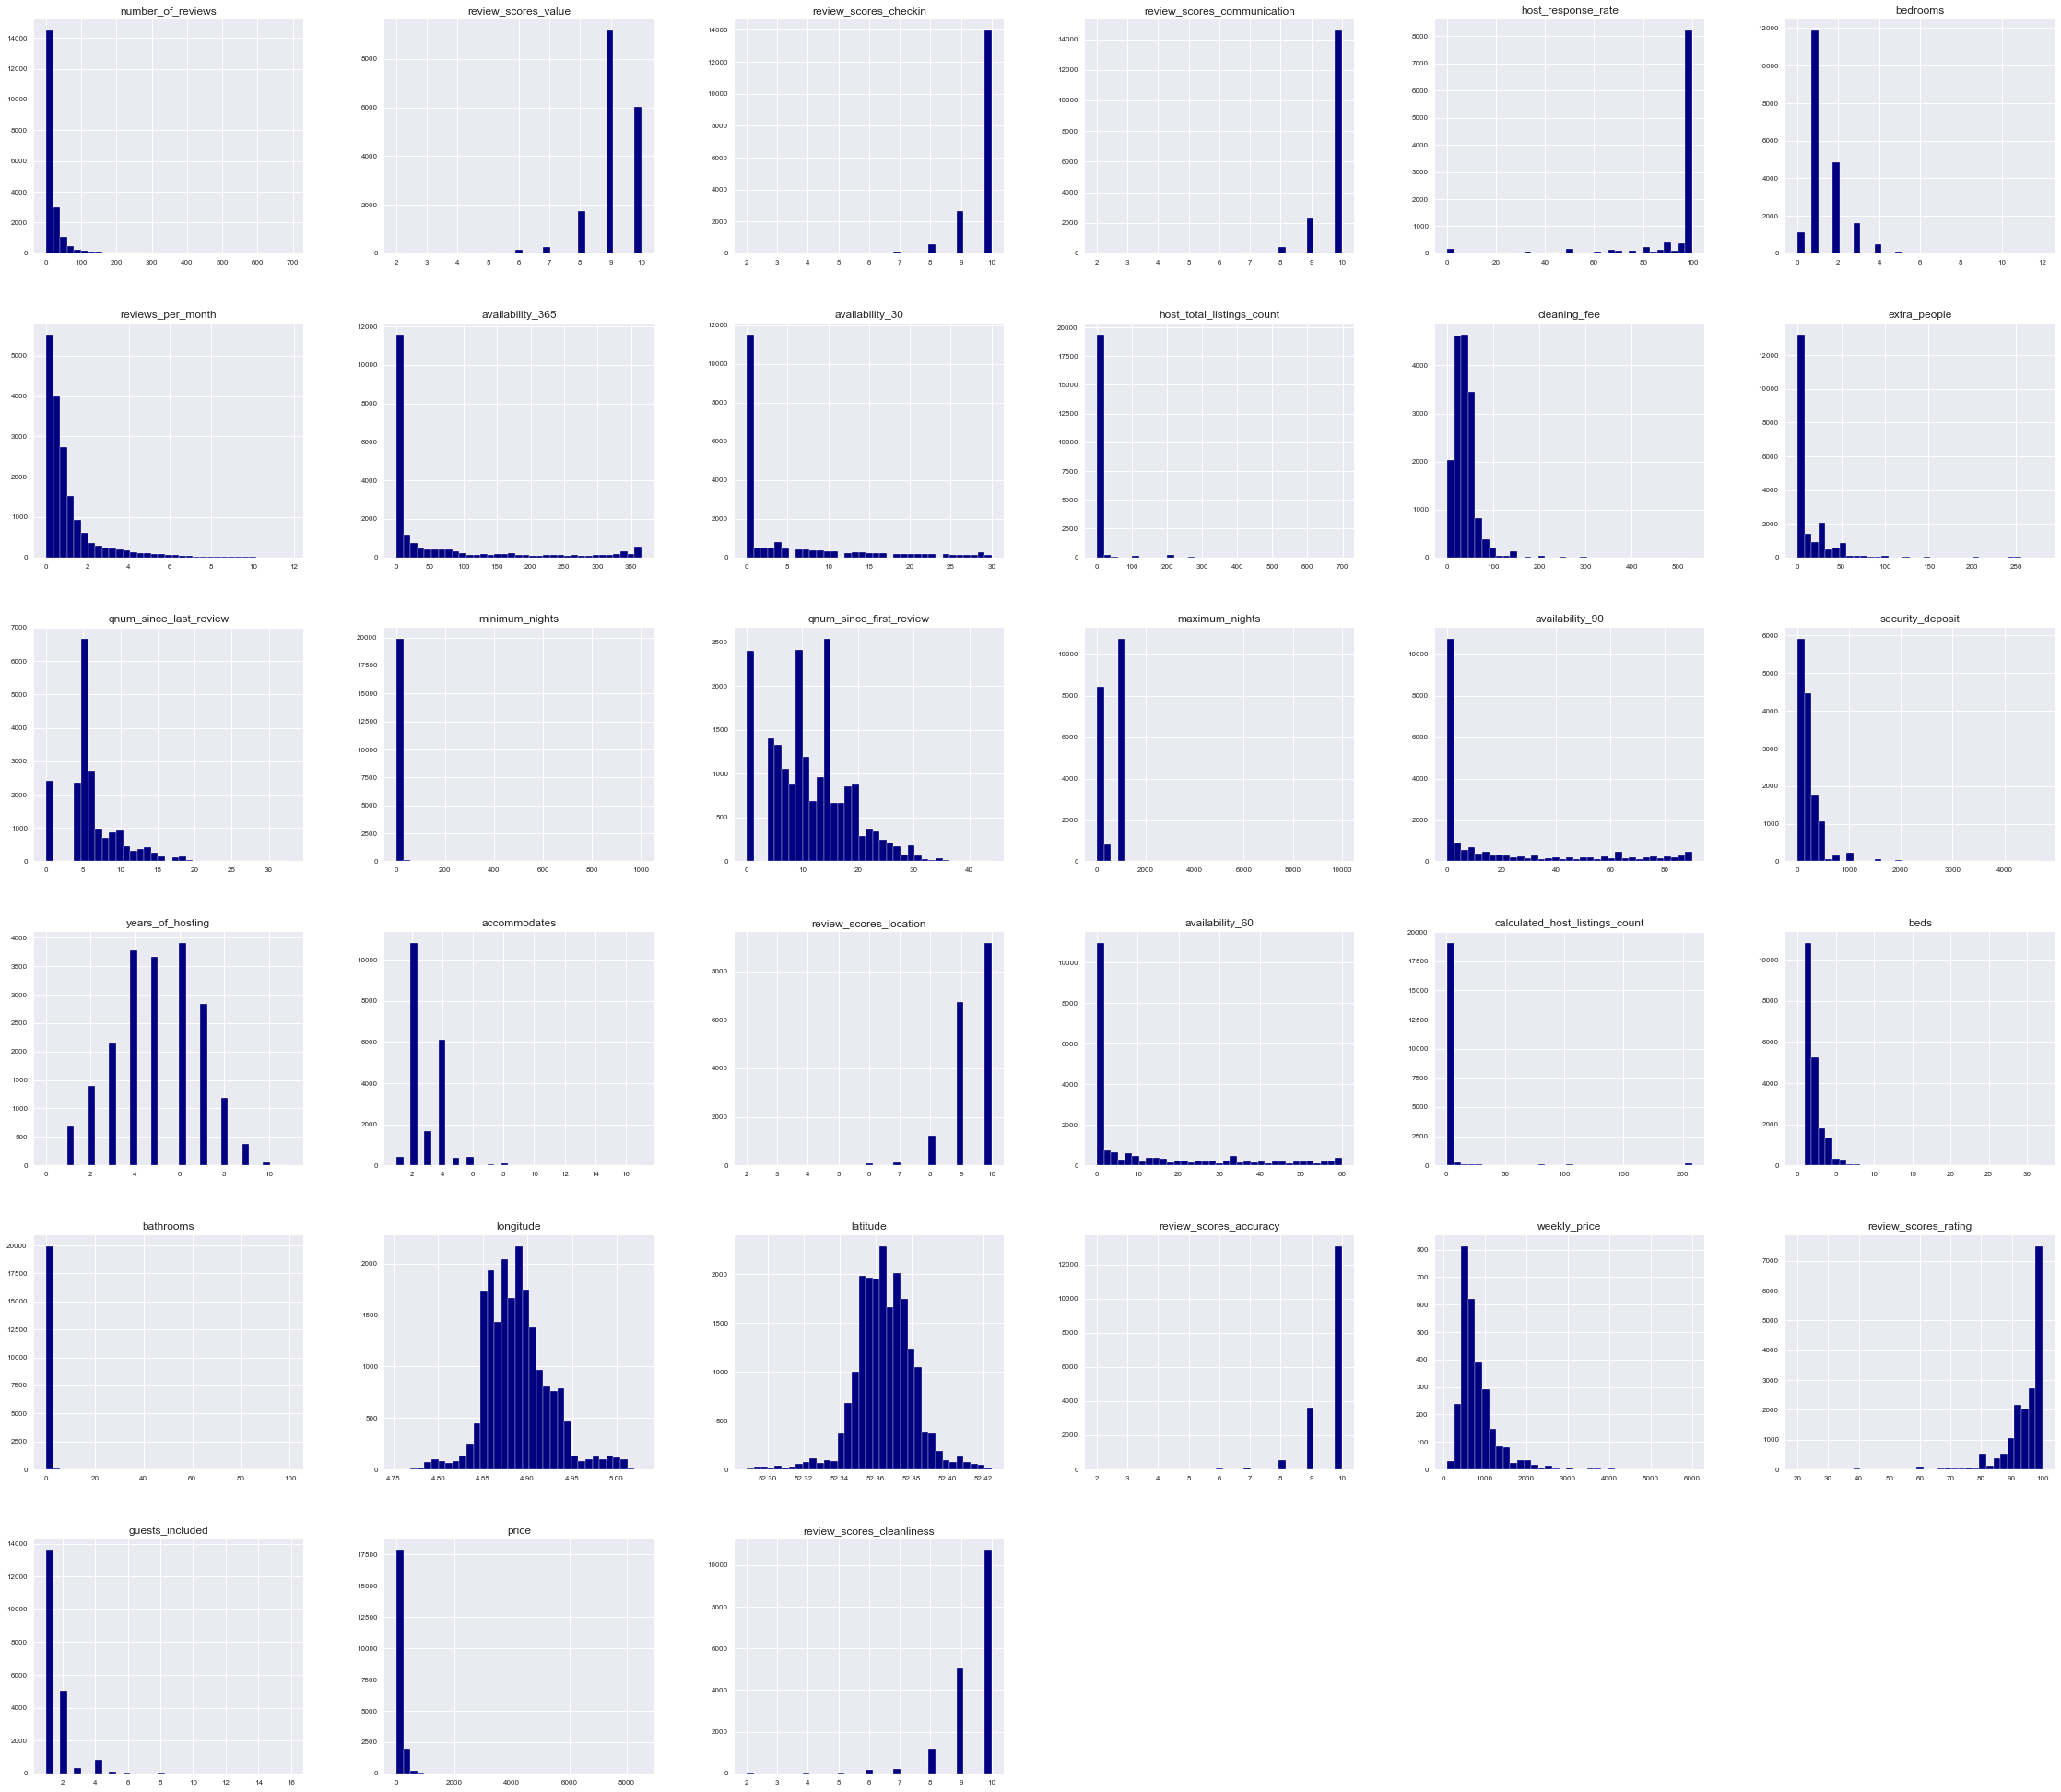

In [75]:
df_num_non_dummy.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

We can see that data is skewed, let's measure the asymmetry of the distribution:

In [196]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df_num_non_dummy.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

20 data columns are positively skewed (skewness > 1), 7 columns are negativley skewed (skewness < -1) later we'll see if outliers or missing values can affect the features distribution.

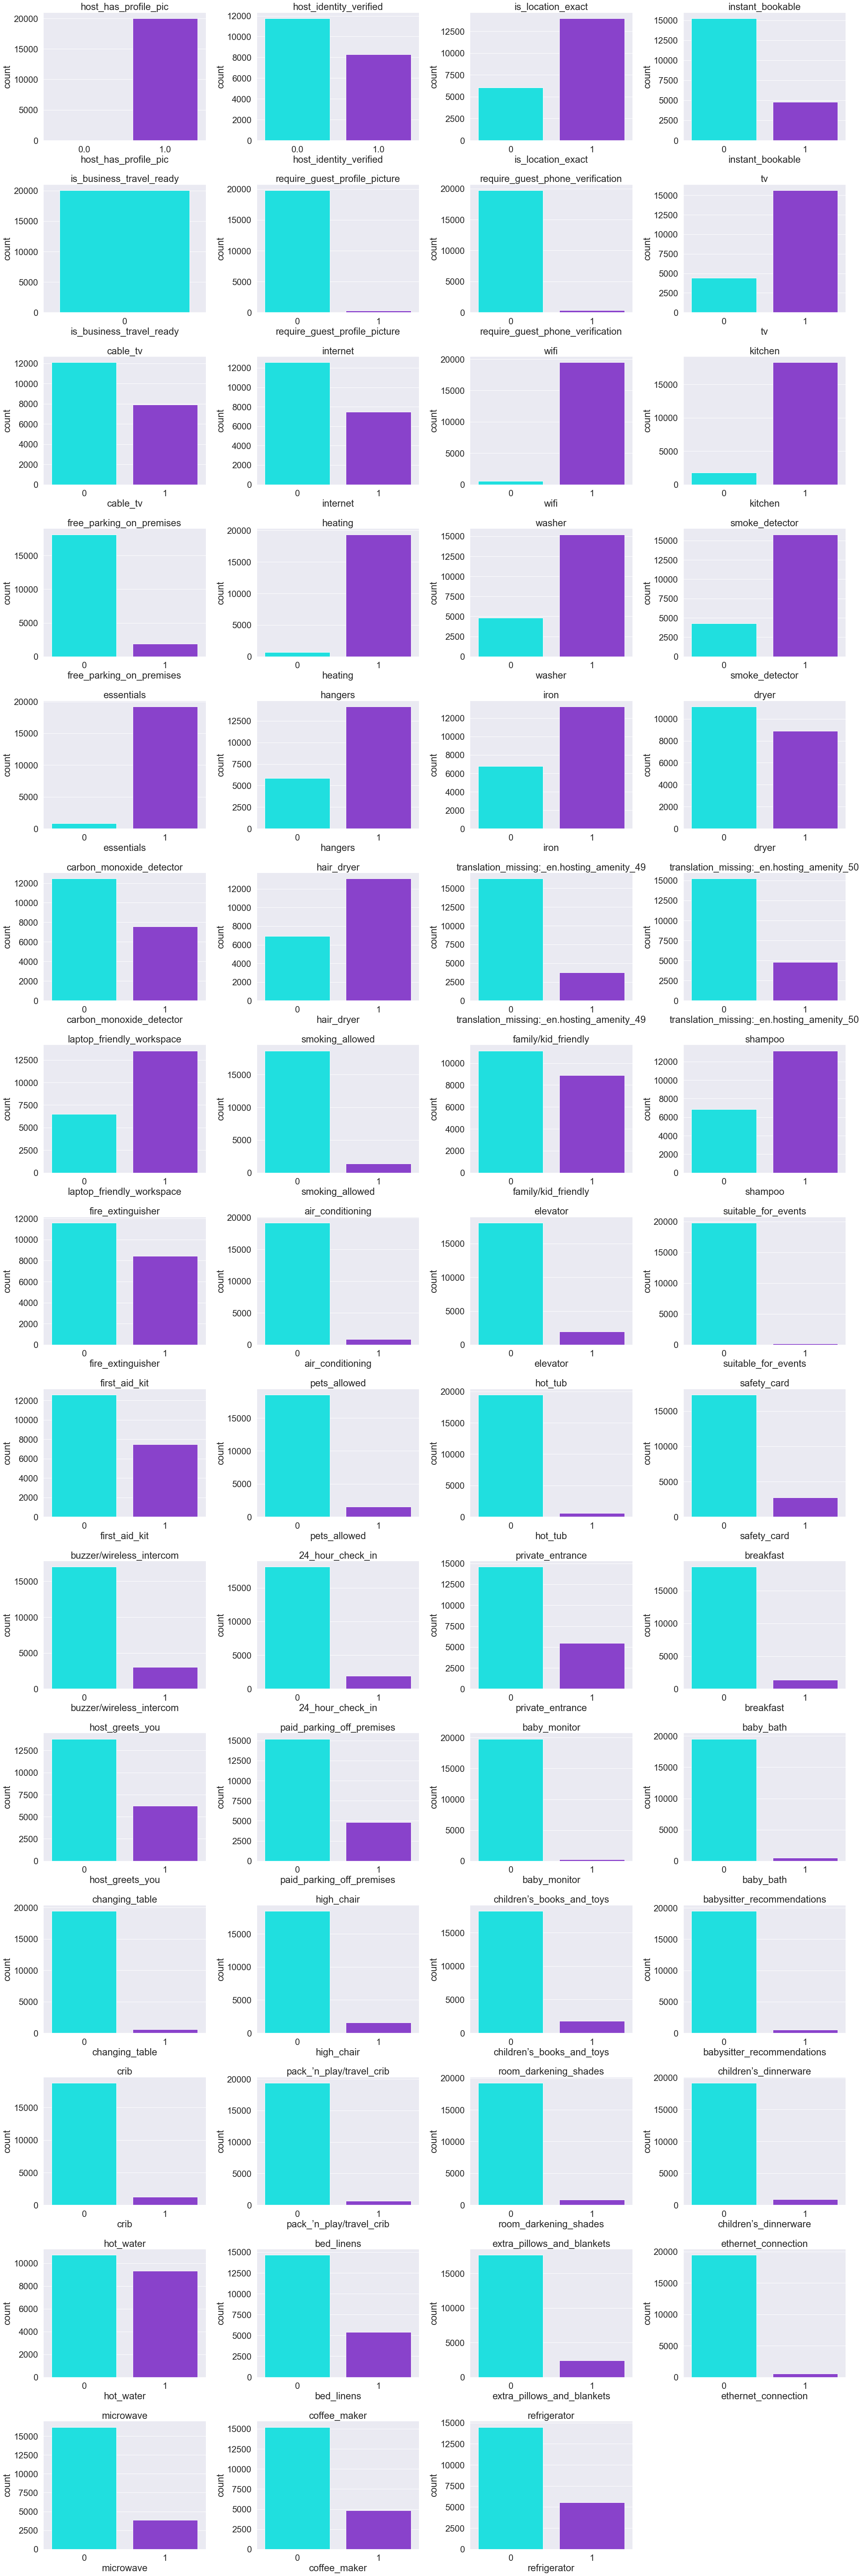

In [37]:
a = 15  # number of rows
b = 4  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(30,90))
plt.subplots_adjust(hspace = 0.8)
sns.set(font_scale = 2)
for i in df_dummy.iloc[:,:60]:
    if i != 'host_is_superhost':
        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(df_dummy[i], palette=['aqua','blueviolet'])
        c = c + 1
fig.tight_layout()
plt.show()

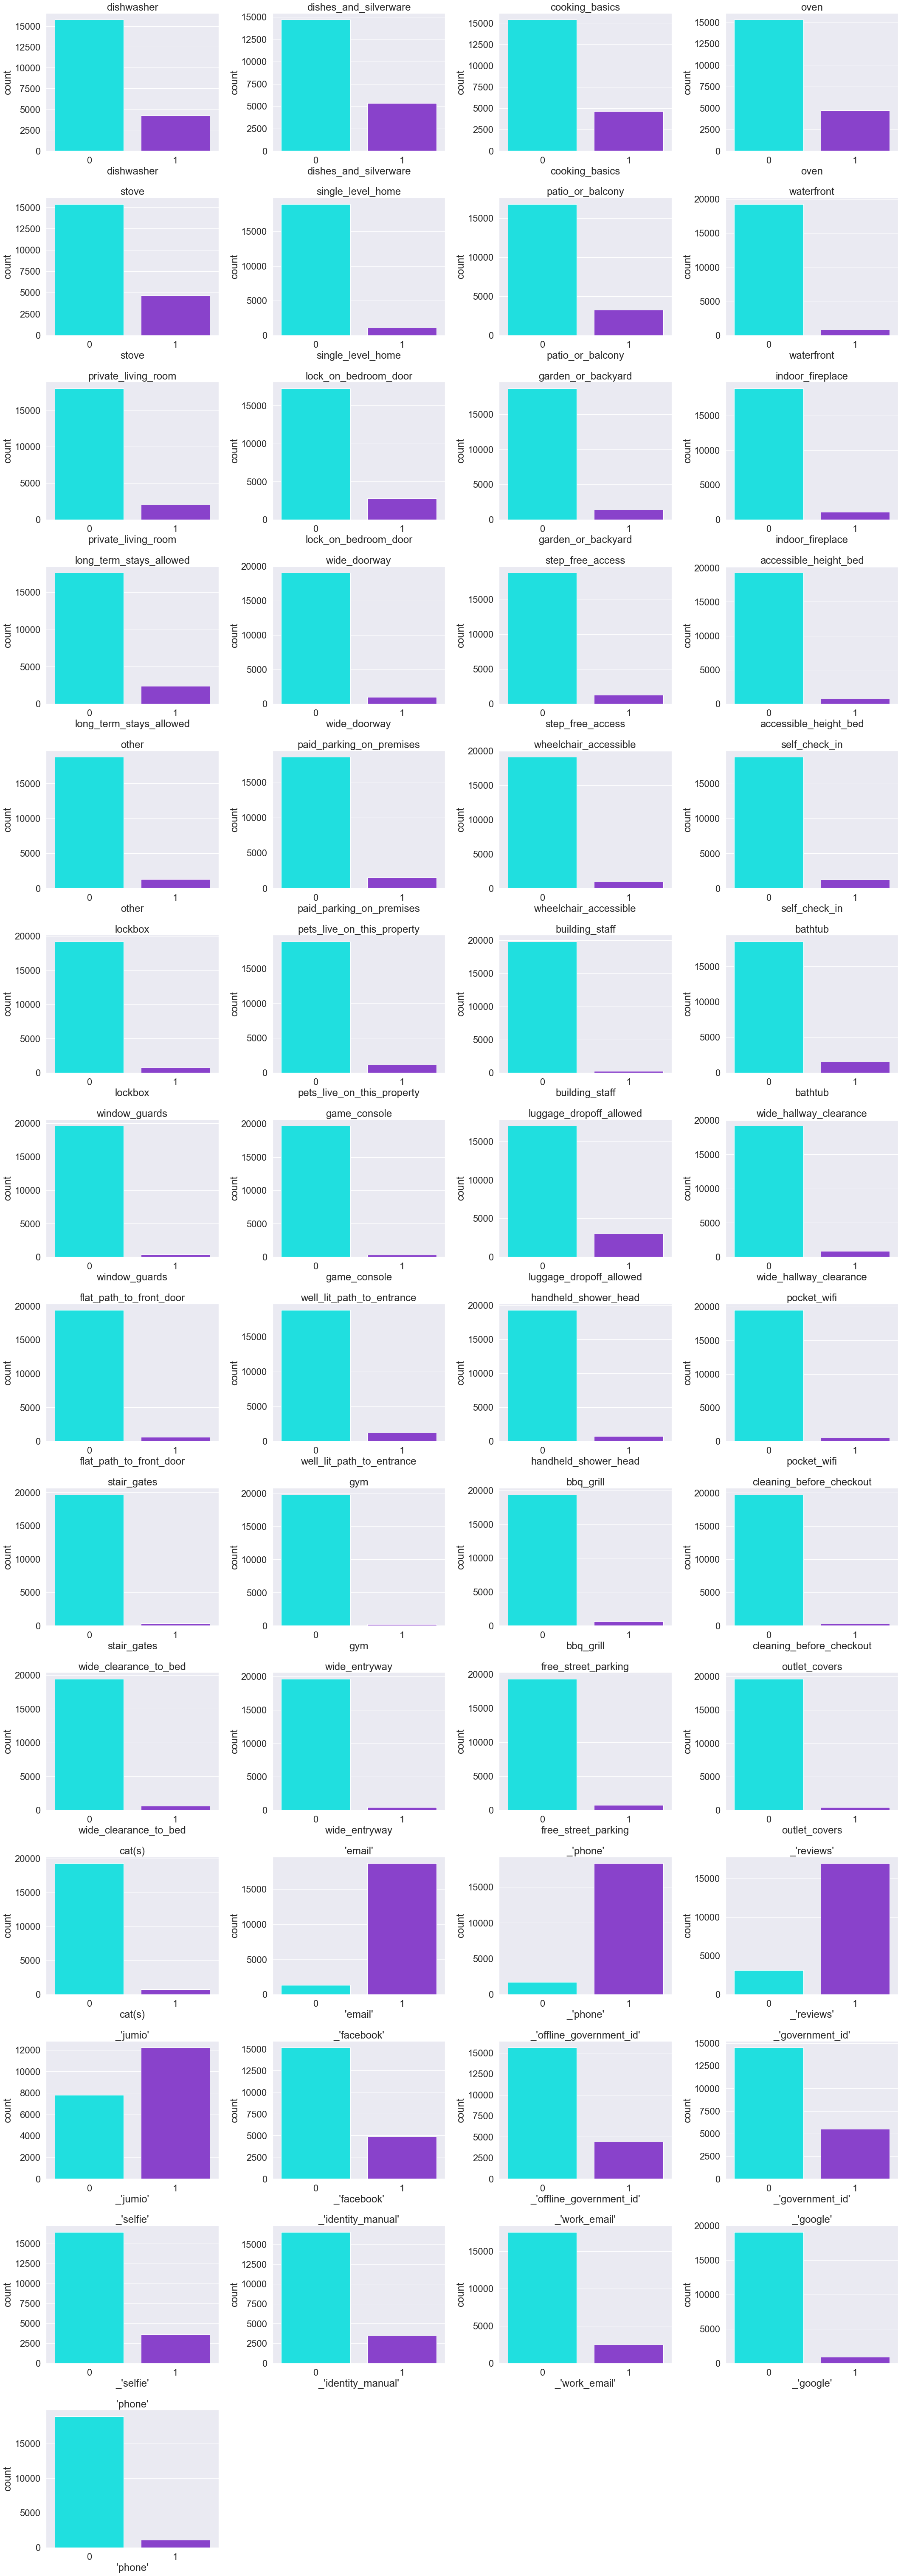

In [38]:
a = 15  # number of rows
b = 4  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(30,90))
plt.subplots_adjust(hspace = 0.8)
sns.set(font_scale = 2)
for i in df_dummy.iloc[:,60:-1]:
    if i != 'host_is_superhost':
        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(df_dummy[i], palette=['aqua','blueviolet'])
        c = c + 1
fig.tight_layout()
plt.show()

In [23]:
df_categorial

neighbourhood     host_neighbourhood calendar_updated  \
0               Bijlmer-Oost                    NaN  24-35 month ago   
1            Oosterparkbuurt                    NaN  12-23 month ago   
2      Frederik Hendrikbuurt                    NaN        This week   
3                   Oud-West                    NaN  24-35 month ago   
4                   Oud-West                    NaN  12-23 month ago   
...                      ...                    ...              ...   
20025    Hoofddorppleinbuurt    Hoofddorppleinbuurt   2-3 months ago   
20026  Frederik Hendrikbuurt  Frederik Hendrikbuurt    1-3 weeks ago   
20027             Nellestein                    NaN   2-3 months ago   
20028               Oud-West               Oud-West        This week   
20029    Hoofddorppleinbuurt    Hoofddorppleinbuurt        This week   

               cancellation_policy        room_type  bed_type  \
0      strict_14_with_grace_period  Entire home/apt  Real Bed   
1                         moderate  Entire home/apt  Real Bed   
2      strict_14_with_grace_period  Entire home/apt  Real Bed   
3      strict_14_with_grace_period  Entire home/apt  Real Bed   
4                         moderate  Entire home/apt  Real Bed   
...                            ...              ...       ...   
20025                     flexible  Entire home/apt  Real Bed   
20026                     flexible  Entire home/apt  Real Bed   
20027                     flexible  Entire home/apt  Real Bed   
20028                     flexible  Entire home/apt  Real Bed   
20029                     flexible  Entire home/apt  Real Bed   

       host_response_time property_type host_location  neighbourhood_cleansed  
0                     NaN     Apartment   Netherlands            Bijlmer-Oost  
1                     NaN     Apartment   Netherlands                Oud-Oost  
2      within a few hours          Boat   Netherlands              Westerpark  
3                     NaN     Apartment   Netherlands  De Baarsjes - Oud-West  
4                     NaN     Apartment   Netherlands              Westerpark  
...                   ...           ...           ...                     ...  
20025  within a few hours     Apartment           NaN                    Zuid  
20026      within an hour     Apartment           NaN              Westerpark  
20027                 NaN   Condominium           NaN   Gaasperdam - Driemond  
20028                 NaN     Apartment           NaN              Westerpark  
20029      within an hour     Apartment           NaN                    Zuid  

[20030 rows x 10 columns]

In [24]:
df_categorial.shape

(20030, 10)

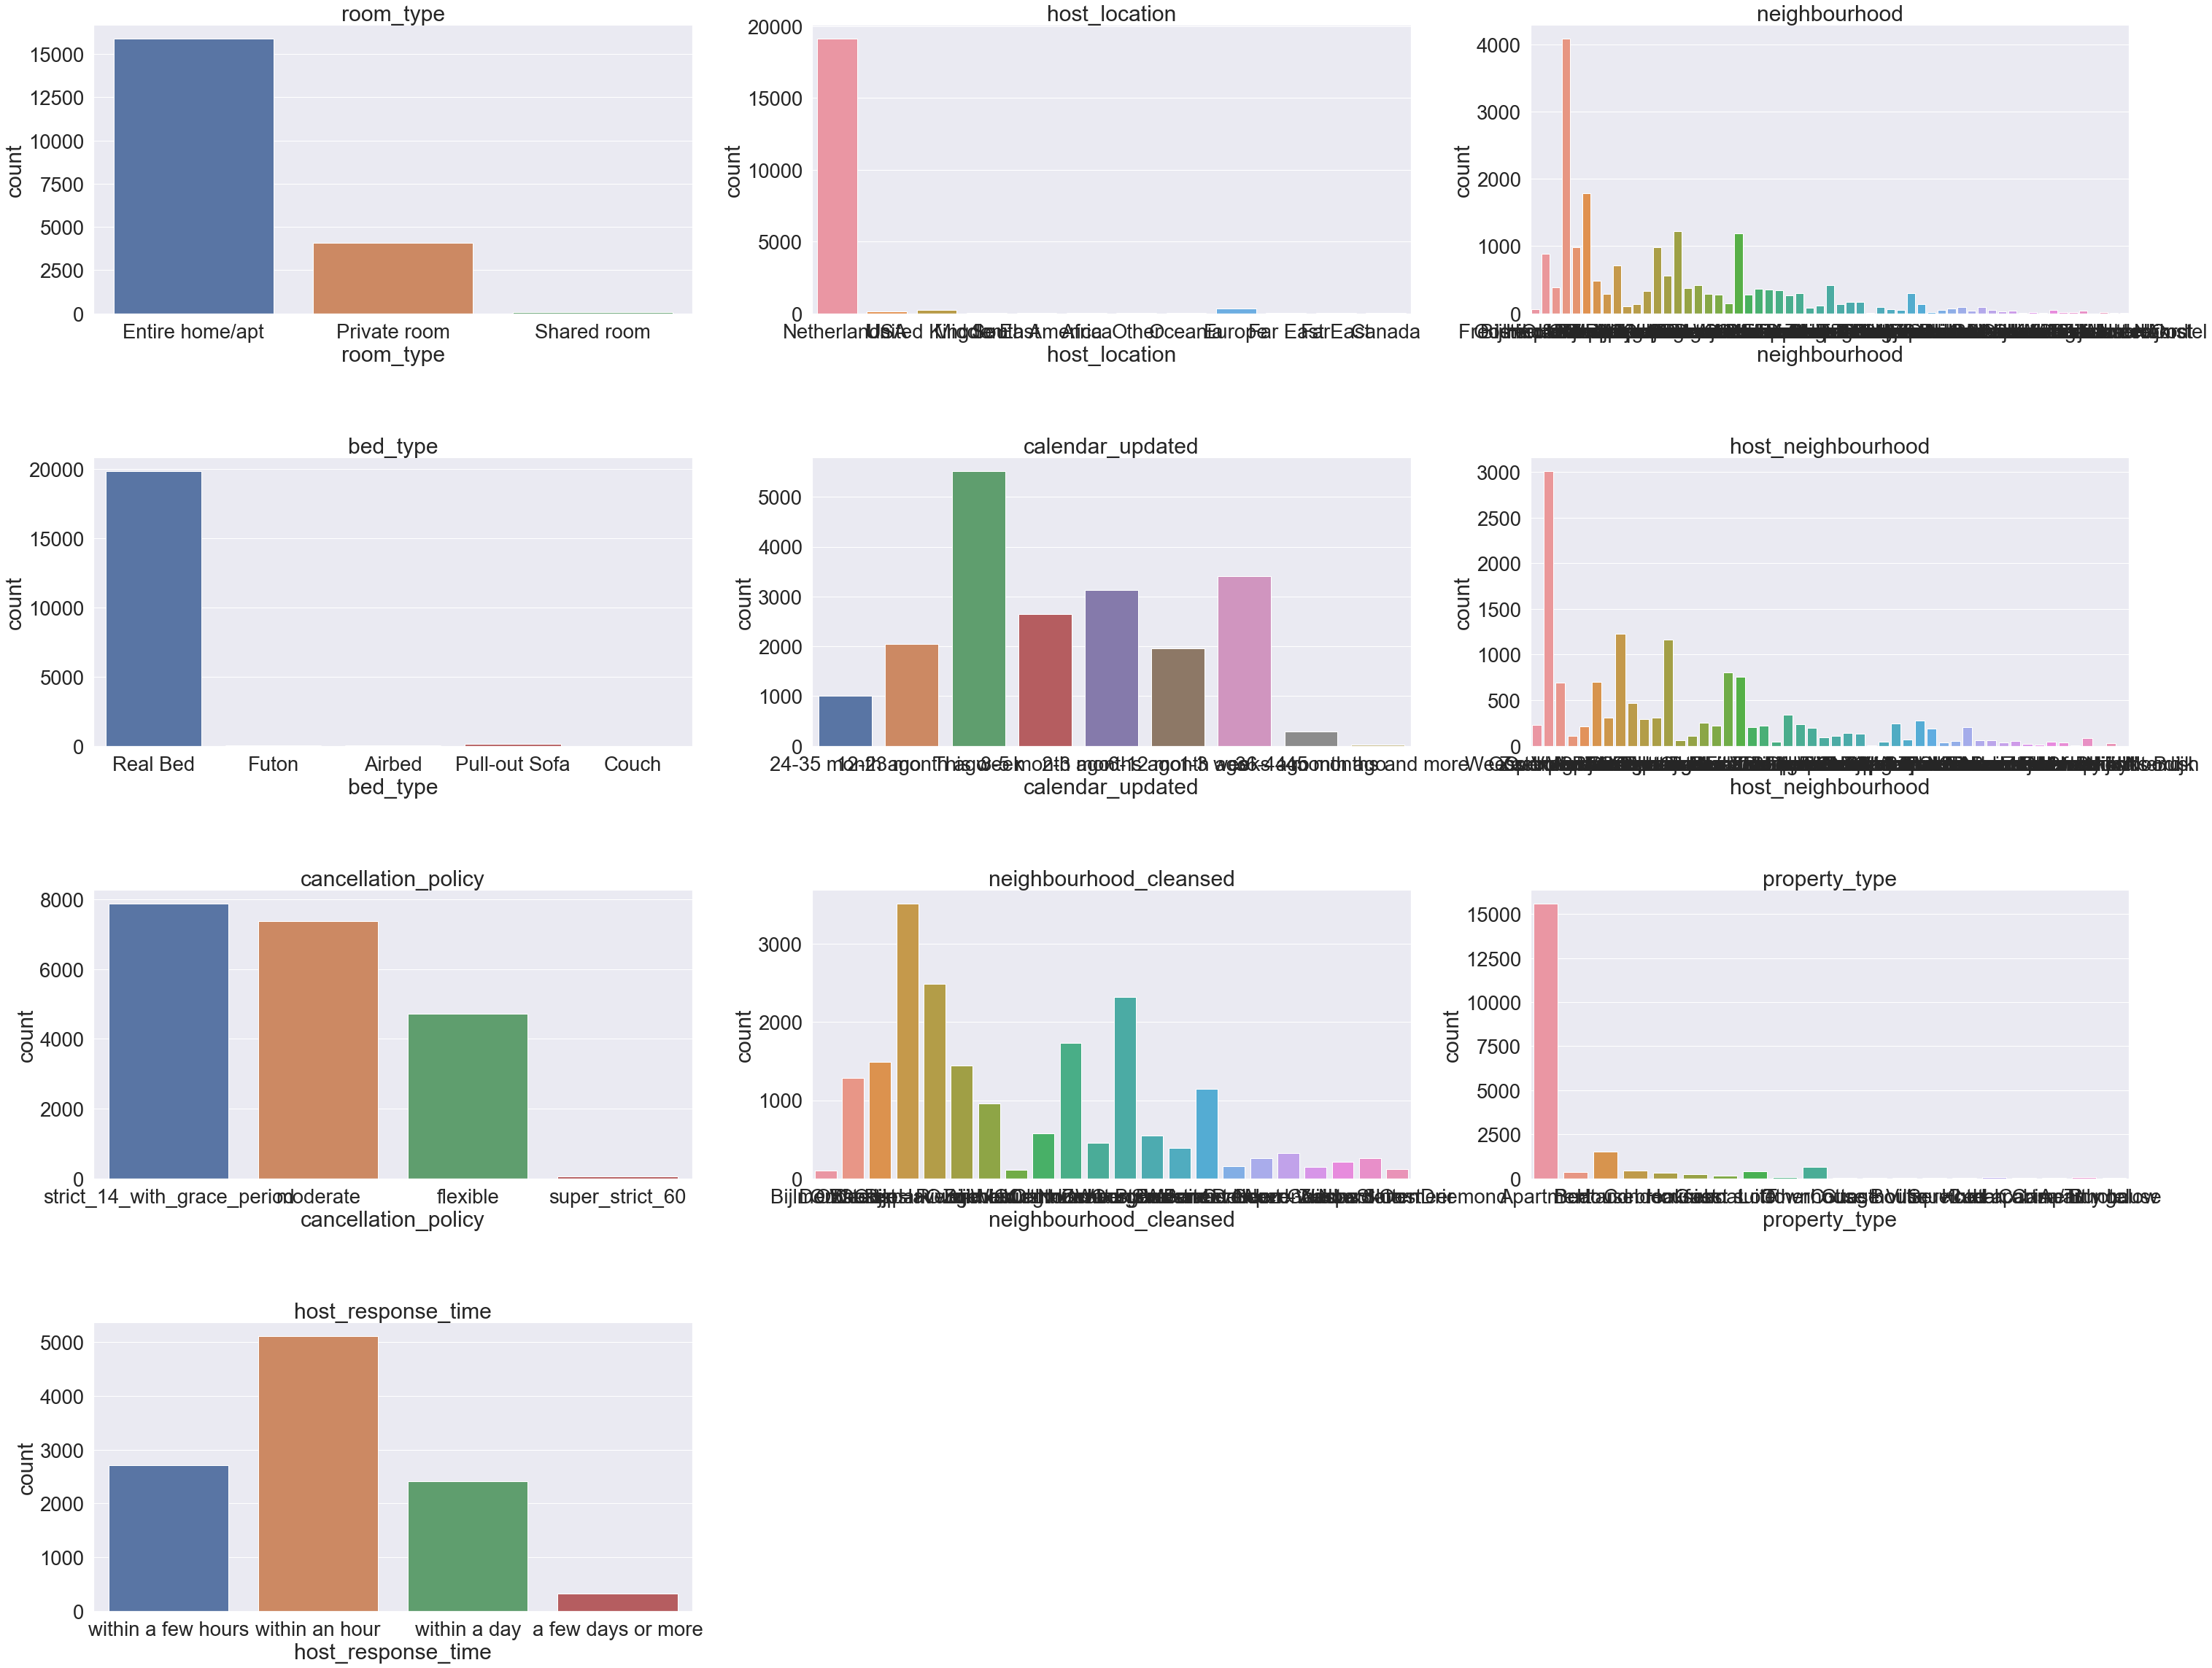

In [44]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in df_categorial:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(df_categorial[i])
        c = c + 1

plt.show()

In [25]:
#### Distribution of the target variable - Host is Superhost:

In [26]:
df['host_is_superhost'].describe()

count    20026.000000
mean         0.158294
std          0.365026
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: host_is_superhost, dtype: float64

<AxesSubplot:xlabel='host_is_superhost', ylabel='count'>

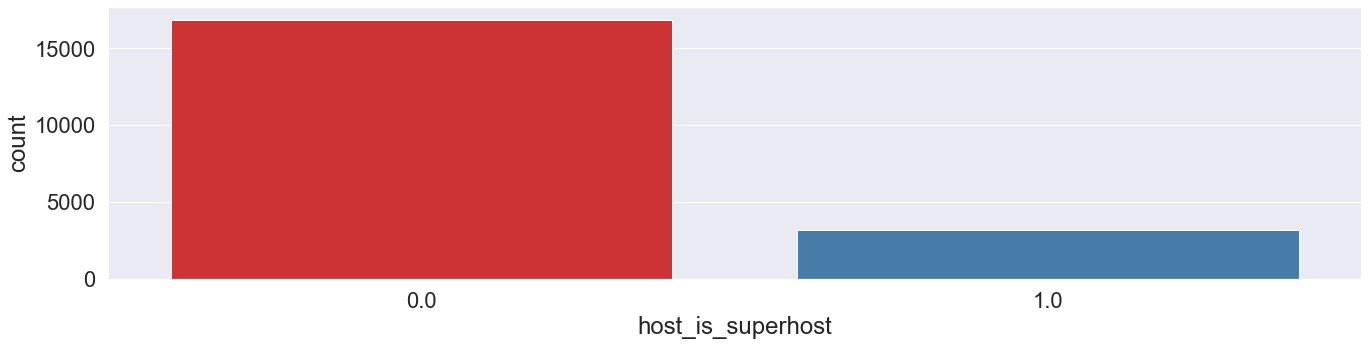

In [87]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x=df['host_is_superhost'].dropna(),data=df, palette="Set1")

# Correlations

We will use spearman since the data is not normally distributed

In [197]:
corr = df.corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

Creating a correlation dataframe showing correlations and the significant levels between numerical features:

In [198]:
from scipy import stats
df_corr= pd.DataFrame(columns=('v1','v2','abscorr','origcorr','pval'))

for i in df_num:
        for j in df_num:
                if i > j:
                        a=stats.spearmanr(df[i], df[j],nan_policy='omit')
                        b="{}/{}".format(i,j)
                        df_corr.loc[b] =[i,j,abs(a[0]),a[0],a[1]]
    
df_corr_filtered= df_corr.loc[(df_corr['abscorr']>0.7 ) & (df_corr['pval']<0.05)]
df_corr_filtered.sort_values(by=['abscorr'],ascending=False)

v1  \
years_of_hosting/host_id                                         years_of_hosting   
availability_90/availability_60                                   availability_90   
_'selfie'/_'identity_manual'                                            _'selfie'   
refrigerator/dishes_and_silverware                                   refrigerator   
availability_60/availability_30                                   availability_60   
host_total_listings_count/calculated_host_listi...      host_total_listings_count   
'phone'/'email'                                                           'phone'   
availability_90/availability_365                                  availability_90   
stove/oven                                                                  stove   
dishes_and_silverware/cooking_basics                        dishes_and_silverware   
refrigerator/coffee_maker                                            refrigerator   
oven/dishes_and_silverware                                                   oven   
stove/dishes_and_silverware                                                 stove   
refrigerator/oven                                                    refrigerator   
stove/cooking_basics                                                        stove   
availability_90/availability_30                                   availability_90   
_'phone'/'email'                                                         _'phone'   
stove/refrigerator                                                          stove   
refrigerator/cooking_basics                                          refrigerator   
oven/cooking_basics                                                          oven   
dishes_and_silverware/coffee_maker                          dishes_and_silverware   
oven/dishwasher                                                              oven   
availability_60/availability_365                                  availability_60   
_'offline_government_id'/_'government_id'                _'offline_government_id'   
beds/accommodates                                                            beds   
qnum_since_first_review/id                                qnum_since_first_review   
dishwasher/dishes_and_silverware                                       dishwasher   
stove/dishwasher                                                            stove   
refrigerator/dishwasher                                              refrigerator   
dishwasher/cooking_basics                                              dishwasher   
self_check_in/lockbox                                               self_check_in   
oven/coffee_maker                                                            oven   
cooking_basics/coffee_maker                                        cooking_basics   
_'phone'/'phone'                                                         _'phone'   
stove/coffee_maker                                                          stove   
pets_live_on_this_property/cat(s)                      pets_live_on_this_property   
weekly_price/price                                                   weekly_price   
refrigerator/microwave                                               refrigerator   
availability_365/availability_30                                 availability_365   
require_guest_profile_picture/require_guest_pho...  require_guest_profile_picture   
dishwasher/coffee_maker                                                dishwasher   
microwave/dishes_and_silverware                                         microwave   
beds/bedrooms                                                                beds   
oven/microwave                                                               oven   
bedrooms/accommodates                                                    bedrooms   
microwave/coffee_maker                                                  microwave   
stove/microwave                                                             stove   

In [ ]:
# corr to explore beds/accommodates, reviews_per_month/qnum_since_last_review

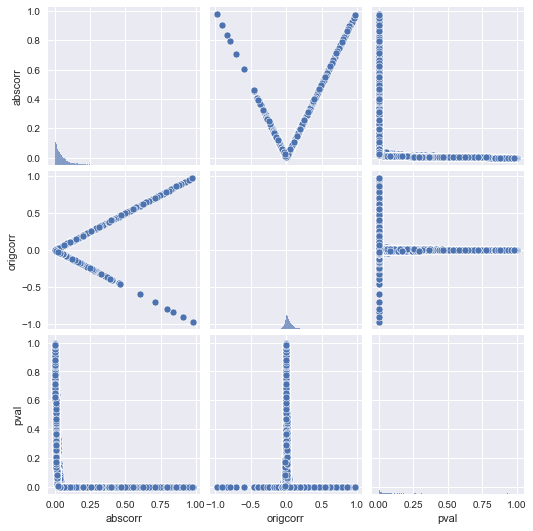

In [14]:
sns.pairplot(df_corr)

Chi-square test for relationships between dummy variables:

In [125]:
#def cramers_corrected_stat(df):
#    chi2_df = pd.DataFrame(columns=['var1','var2','p-value','Chi2 Statistic'])
#    for i in df:
#        if ((i in df_dummy.columns or i in df_categorial.columns) and i != 'host_is_superhost'):
#            for j in df:
#                if (i in df_dummy.columns or i in df_categorial.columns) and j != 'host_is_superhost' and i < j:
#                    confusion_matrix = pd.crosstab(df[i], df[j])
#                    chi_res = chi2_contingency(confusion_matrix)
#                    b = "{}/{}".format(i,j)
#                    if chi_res[1] < 0.05:
#                        chi2_df.loc[b] = [i,j,chi_res[1],chi_res[0]]
                    
#    return chi2_df.sort_values(by='p-value')

#chi2_df = cramers_corrected_stat(df)
#chi2_df_main = chi2_df.head()

In [59]:
#chi2_df_main

var1  \
flat_path_to_front_door/well_lit_path_to_entrance  flat_path_to_front_door   
kitchen/room_type                                                  kitchen   
kitchen/property_type                                              kitchen   
neighbourhood/review_scores_accuracy                         neighbourhood   
changing_table/outlet_covers                                changing_table   

                                                                        var2  \
flat_path_to_front_door/well_lit_path_to_entrance  well_lit_path_to_entrance   
kitchen/room_type                                                  room_type   
kitchen/property_type                                          property_type   
neighbourhood/review_scores_accuracy                  review_scores_accuracy   
changing_table/outlet_covers                                   outlet_covers   

                                                   p-value  Chi2 Statistic  
flat_path_to_front_door/well_lit_path_to_entrance      0.0     5648.211701  
kitchen/room_type                                      0.0     3967.879803  
kitchen/property_type                                  0.0     2860.101566  
neighbourhood/review_scores_accuracy                   0.0     2962.545850  
changing_table/outlet_covers                           0.0     4462.421742

Spearman Correlations with the Target Value - Host is Superhost

In [199]:
df_target= pd.DataFrame(columns=('abscorr','origcorr','pval'))

for i in df_num:
       
                if i != 'host_is_superhost':
                        a=stats.spearmanr(df[i], df['host_is_superhost'],nan_policy='omit')
                        b="{}/host_is_superhost".format(i,j)
                        df_target.loc[b] =[abs(a[0]),a[0],a[1]]
                        
df_target= df_target.loc[(df_target['abscorr']<0.7 ) & (df_target['pval']<0.05)]
df_target.sort_values(by=['abscorr'],ascending=False)

abscorr  origcorr           pval
number_of_reviews/host_is_superhost          0.389872  0.389872   0.000000e+00
reviews_per_month/host_is_superhost          0.379042  0.379042   0.000000e+00
hot_water/host_is_superhost                  0.204013  0.204013  3.899844e-187
review_scores_cleanliness/host_is_superhost  0.193261  0.193261  6.992178e-146
review_scores_accuracy/host_is_superhost     0.185138  0.185138  8.117712e-134
...                                               ...       ...            ...
pets_allowed/host_is_superhost               0.015533  0.015533   2.793853e-02
bathtub/host_is_superhost                    0.015098  0.015098   3.263604e-02
air_conditioning/host_is_superhost           0.014555  0.014555   3.942113e-02
other/host_is_superhost                      0.014199  0.014199   4.449778e-02
host_has_profile_pic/host_is_superhost       0.014051  0.014051   4.677738e-02

[124 rows x 3 columns]

number_of_reviews and reviews_per_months has an expected relation. Let's reflect one of them

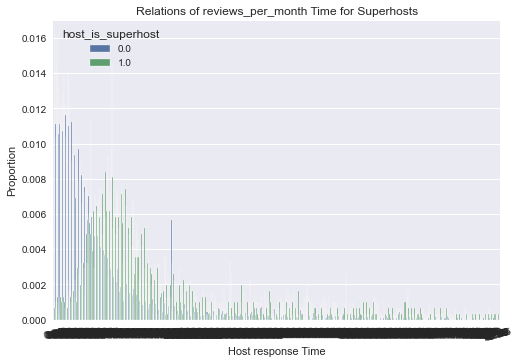

In [200]:
x, y, hue = "reviews_per_month", "Proportion", "host_is_superhost"
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df)
#plt.legend(title=i, loc='upper right', labels=['Yes', 'No'])
plt.xticks(rotation=15)
plt.xlabel('Host response Time')
plt.title('Relations of reviews_per_month Time for Superhosts')
plt.show()

For relationships between dummy and categorical variables and host_is_superhost we'll use one-way ANOVA, with log(host_is_superhost) as input:

In [201]:
from scipy.stats import f_oneway
df_anova_dummy=pd.DataFrame(columns=('category','cor','pval'))
names=df_categorial.columns

for i in names:
    if i != 'host_is_superhost':
        CategoryGroupList=df.groupby(i)['host_is_superhost'].apply(list)
        AnovaResults=f_oneway(*CategoryGroupList)
        anova=AnovaResults[0]
        pval=AnovaResults[1]
        b="{}/host_is_superhost".format(i)
        df_anova_dummy.loc[b]=[i,anova,pval]
        
        df_anova_dummy_filtered=df_anova_dummy.loc[(df_anova_dummy['pval']<0.05)]

In [76]:
df_anova_dummy.to_csv('amsterdam_avona_dummy.csv')

In [64]:
df_anova_dummy_filtered.sort_values(by=['cor'],ascending=False)

category        cor  \
host_response_time/host_is_superhost  host_response_time  70.651491   
host_neighbourhood/host_is_superhost  host_neighbourhood   5.545579   
host_location/host_is_superhost            host_location   3.503565   

                                              pval  
host_response_time/host_is_superhost  3.118953e-45  
host_neighbourhood/host_is_superhost  3.059733e-32  
host_location/host_is_superhost       6.412931e-05

Visualizing the Anova with correleted values: dummies and target value

<AxesSubplot:xlabel='host_response_time', ylabel='host_is_superhost'>

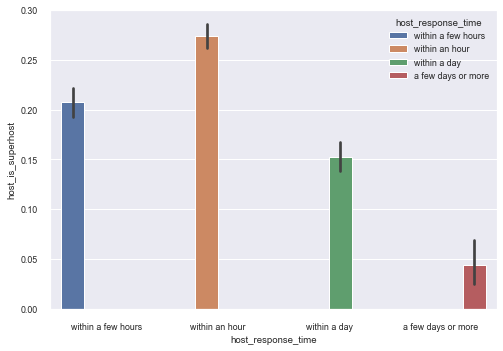

In [64]:
sns.barplot(data=df,y='host_is_superhost',hue='host_response_time',x=i)

Correlatin of Superhost and Host Neigbohorhood
#aggrigarte room to conclude

<AxesSubplot:xlabel='host_is_superhost', ylabel='host_neighbourhood'>

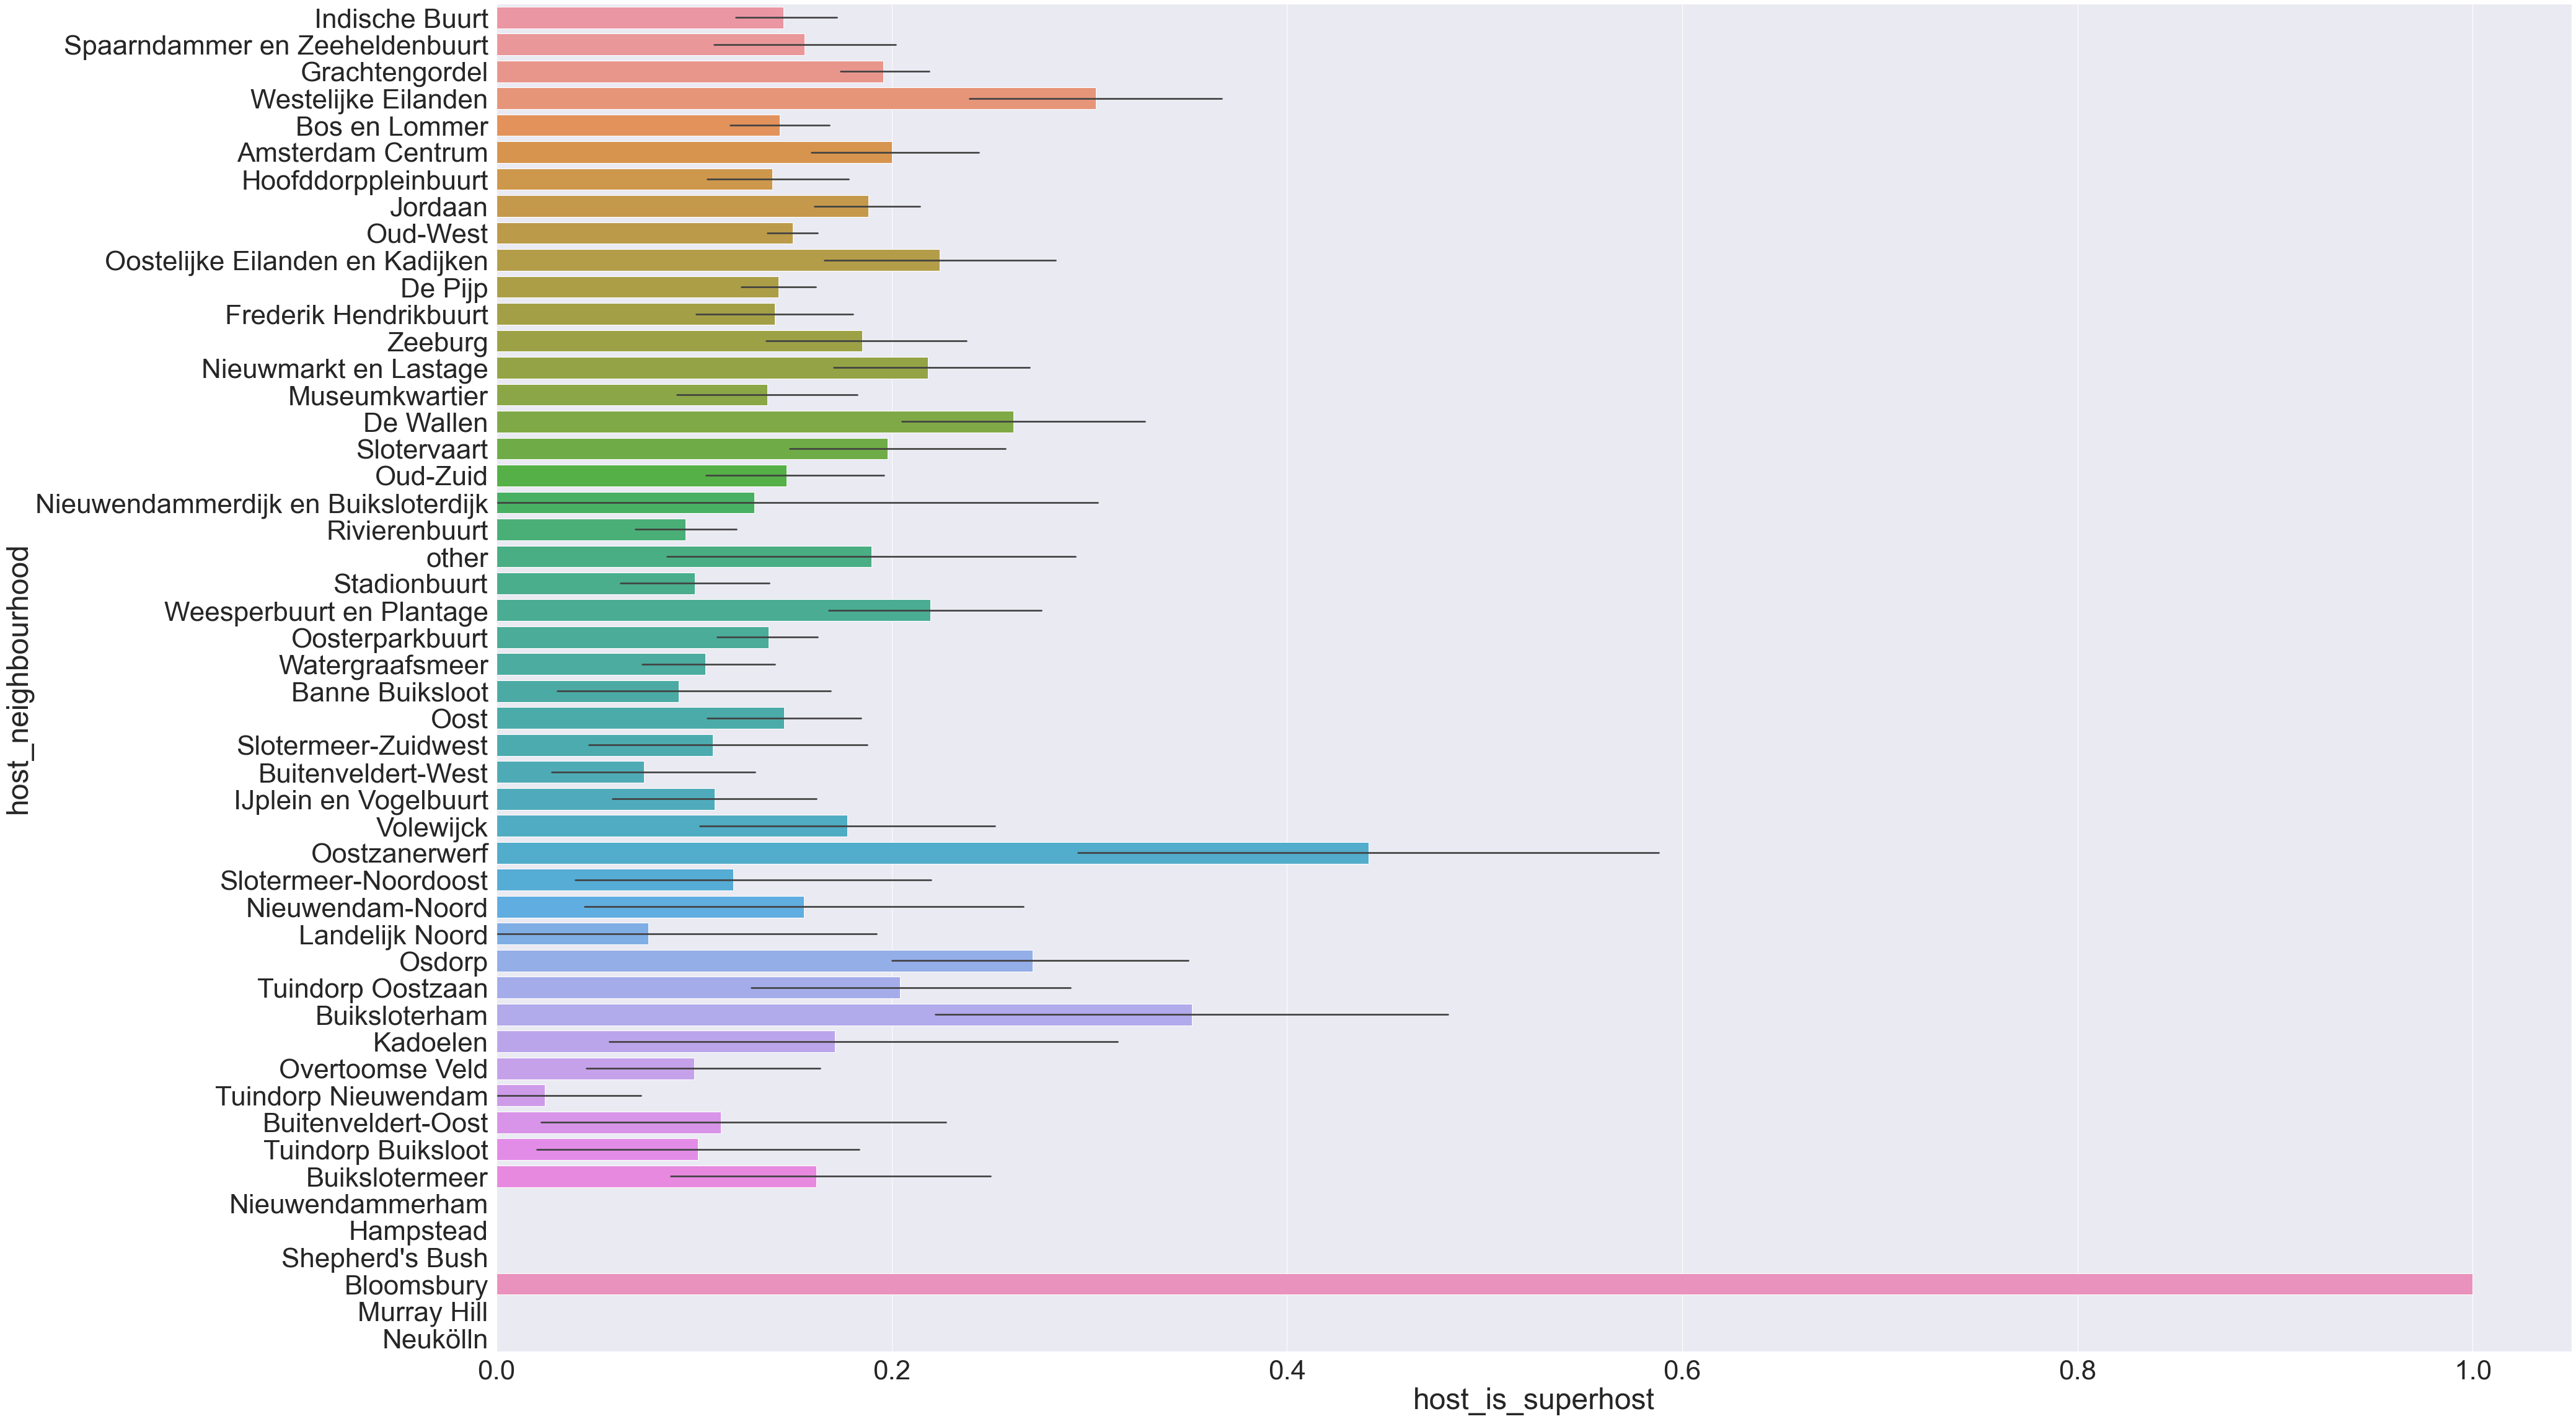

In [61]:
sns.set(rc = {'figure.figsize':(60,40)})
sns.set(font_scale = 4)
sns.barplot(data=df,x='host_is_superhost',y='host_neighbourhood')


Bloomsbury UK Nieuwendammerdijk en Buiksloterdijk

Correlatin of Superhost and Host Location

<AxesSubplot:xlabel='host_is_superhost', ylabel='host_location'>

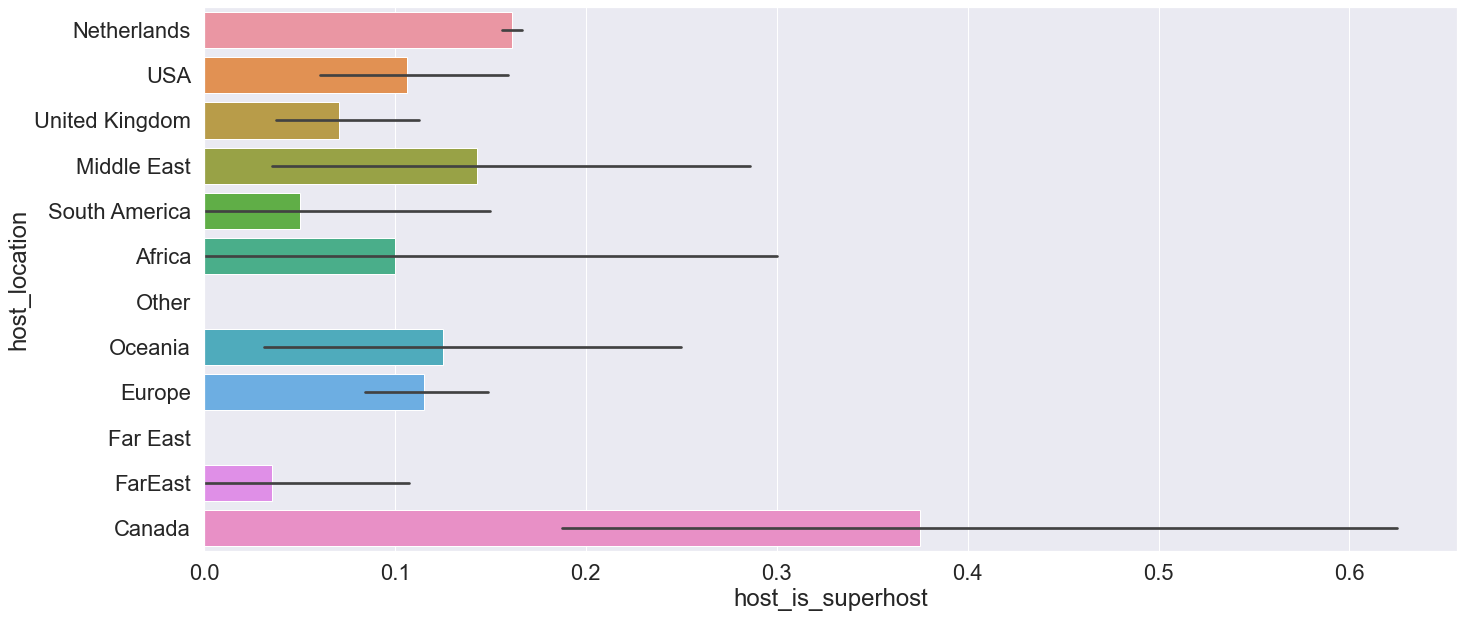

In [148]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale = 2)
sns.barplot(data=df,x='host_is_superhost',y='host_location')

There is a segnificant correlation Canadians hosts....

# Next to outliers